# import lib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import keras
os.environ['KERAS_BACKEND'] = 'tensorflow'

## data loading

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [ ]:

image_directory = '/content/gdrive/MyDrive/aiml_lab/'
SIZE = 64
dataset = []  
label = []  


### AbdomenCT_img 

In [ ]:
AbdomenCityScan_image = os.listdir(image_directory + 'AbdomenCT/')
for i, image_name in enumerate(AbdomenCityScan_image):    
    
    if (image_name.split('.')[1] == 'jpeg'):
        img = cv2.imread(image_directory + 'AbdomenCT/' + image_name)
        img = Image.fromarray(img, 'RGB')
        img = img.resize((SIZE, SIZE))
        dataset.append(np.array(img))
        label.append(0)


### CXR_img

In [ ]:
ChestXR_image = os.listdir(image_directory + 'CXR/')
for i, image_name in enumerate(ChestXR_image):
    if (image_name.split('.')[1] == 'jpeg'):
        img = cv2.imread(image_directory + 'CXR/' + image_name)
        img = Image.fromarray(img, 'RGB')
        img = img.resize((SIZE, SIZE))
        dataset.append(np.array(img))
        label.append(1)


### chestct_img

In [ ]:
ChestCityScan_image = os.listdir(image_directory + 'ChestCT/')
for i, image_name in enumerate(ChestCityScan_image):
    if (image_name.split('.')[1] == 'jpeg'):
        img = cv2.imread(image_directory + 'ChestCT/' + image_name)
        img = Image.fromarray(img, 'RGB')
        img = img.resize((SIZE, SIZE))
        dataset.append(np.array(img))
        label.append(2)

### hand_img

In [ ]:
Hand_image = os.listdir(image_directory + 'Hand/')
for i, image_name in enumerate(Hand_image):
    if (image_name.split('.')[1] == 'jpeg'):
        img = cv2.imread(image_directory + 'Hand/' + image_name)
        img = Image.fromarray(img, 'RGB')
        img = img.resize((SIZE, SIZE))
        dataset.append(np.array(img))
        label.append(3)

Headct_img

In [ ]:
HeadCityScan_image = os.listdir(image_directory + 'HeadCT/')
for i, image_name in enumerate(HeadCityScan_image):
    if (image_name.split('.')[1] == 'jpeg'):
        img = cv2.imread(image_directory + 'HeadCT/' + image_name)
        img = Image.fromarray(img, 'RGB')
        img = img.resize((SIZE, SIZE))
        dataset.append(np.array(img))
        label.append(4)


## model 

In [ ]:
INPUT_SHAPE = (SIZE, SIZE, 3)   
inp = keras.layers.Input(shape=INPUT_SHAPE)

conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3), 
                               activation='relu', padding='same')(inp)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
norm1 = keras.layers.BatchNormalization(axis = -1)(pool1)
drop1 = keras.layers.Dropout(rate=0.2)(norm1)
conv2 = keras.layers.Conv2D(32, kernel_size=(3, 3), 
                               activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
norm2 = keras.layers.BatchNormalization(axis = -1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)

flat = keras.layers.Flatten()(drop2)  

hidden1 = keras.layers.Dense(512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis = -1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)
hidden2 = keras.layers.Dense(256, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis = -1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

out = keras.layers.Dense(5, activation='softmax')(drop4)  


In [ ]:
model = keras.Model(inputs=inp, outputs=out)

In [ ]:
model.compile(optimizer='adam',
                loss='categorical_crossentropy',  
                metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248  

## spliting data 70 30

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.30, random_state = 1000)


In [ ]:
history = model.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 10,     
                         validation_split = 0.1,
                         shuffle = False
                     
                     )

Epoch 1/10
493/493 [==============================] - 18s 12ms/step - loss: 0.0312 - accuracy: 0.9900 - val_loss: 0.0130 - val_accuracy: 0.9969
Epoch 2/10
493/493 [==============================] - 6s 13ms/step - loss: 0.0060 - accuracy: 0.9984 - val_loss: 0.0058 - val_accuracy: 0.9977
Epoch 3/10
493/493 [==============================] - 5s 11ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.6065 - val_accuracy: 0.8016
Epoch 4/10
493/493 [==============================] - 6s 12ms/step - loss: 0.0095 - accuracy: 0.9968 - val_loss: 0.0106 - val_accuracy: 0.9971
Epoch 5/10
493/493 [==============================] - 7s 14ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0080 - val_accuracy: 0.9983
Epoch 6/10
493/493 [==============================] - 6s 11ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.0084 - val_accuracy: 0.9977
Epoch 7/10
493/493 [==============================] - 6s 13ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0133 - val_accuracy: 0.996

In [ ]:
print("Our Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))


470/470 [==============================] - 2s 4ms/step - loss: 0.0031 - accuracy: 0.9995
Test_Accuracy: 99.95%


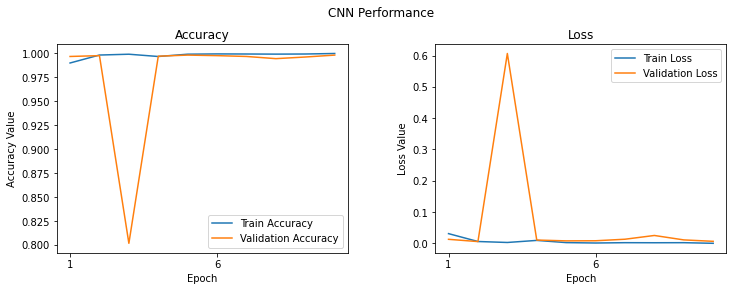

In [ ]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('The CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['the accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['the accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('The Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('The Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")
